#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [6]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import pandas as pd

In [49]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [17]:
import warnings

warnings.filterwarnings('ignore')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [9]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

In [19]:
df = pd.read_sql(sql, con)

In [21]:
df

,hire_year,employee_count
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [38]:
df.columns = ['Year','Employee number']

In [40]:
df

,Year,Employee number
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


In [32]:
import matplotlib.pyplot as plt

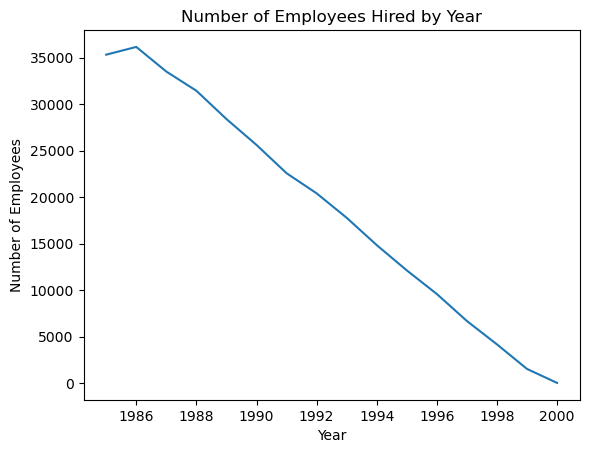

In [51]:
plt.plot(df['Year'], df['Employee number'])

plt.title('Number of Employees Hired by Year')
plt.xlabel('Year')
plt.ylabel('Number of Employees')

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [67]:
sql = """
SELECT emp_no, 
       title, 
       TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_on_position,
       from_date,
       to_date
FROM titles
WHERE title = 'Engineer'
AND to_date != '9999-01-01';
"""

df_years = pd.read_sql(sql, con)

In [69]:
df_years

,emp_no,title,years_on_position,from_date,to_date
0,10004,Engineer,9,1986-12-01,1995-12-01
1,10009,Engineer,5,1990-02-18,1995-02-18
2,10012,Engineer,8,1992-12-18,2000-12-18
3,10018,Engineer,8,1987-04-03,1995-04-03
4,10026,Engineer,5,1995-03-20,2001-03-19
...,...,...,...,...,...
84015,499972,Engineer,9,1989-11-23,1998-11-23
84016,499984,Engineer,5,1989-07-30,1994-07-30
84017,499994,Engineer,0,1993-02-22,1993-10-27
84018,499996,Engineer,6,1996-05-13,2002-05-13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

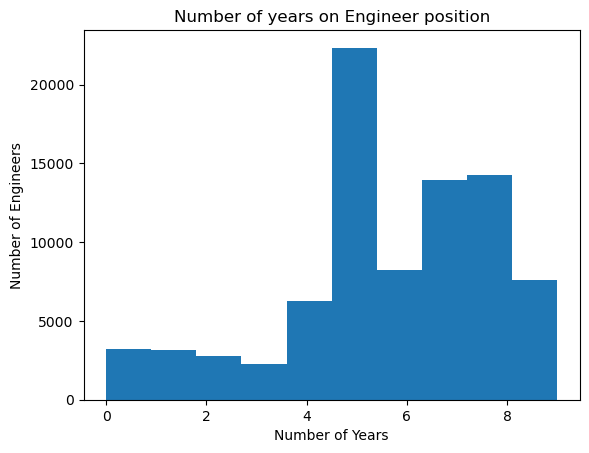

In [76]:
plt.hist(df_years['years_on_position'])

plt.title('Number of years on Engineer position')
plt.xlabel('Number of Years')
plt.ylabel('Number of Engineers')

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [78]:
con.close()